In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DataSource:
    
    Kaggle: https://www.kaggle.com/shivamb/netflix-shows
    
    Medium: https://towardsdatascience.com/exploring-netflix-data-in-python-eb03e8f3944c

In [126]:
netflix_db=pd.read_csv('netflix_titles.csv')

In [127]:
netflix_db.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [65]:
netflix_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [66]:
netflix_db.date_added=pd.to_datetime(netflix_db.date_added)

In [67]:
netflix_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director      4265 non-null   object        
 4   cast          5664 non-null   object        
 5   country       5758 non-null   object        
 6   date_added    6223 non-null   datetime64[ns]
 7   release_year  6234 non-null   int64         
 8   rating        6224 non-null   object        
 9   duration      6234 non-null   object        
 10  listed_in     6234 non-null   object        
 11  description   6234 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 584.6+ KB


In [68]:
netflix_db['duration'].value_counts()

1 Season     1321
2 Seasons     304
3 Seasons     158
90 min        111
91 min        104
             ... 
193 min         1
214 min         1
203 min         1
182 min         1
196 min         1
Name: duration, Length: 201, dtype: int64

In [69]:
netflix_db.shape

(6234, 12)

In [70]:
print("The no of rows",len(netflix_db))
netflix_db.head()

The no of rows 6234


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


2.#### We can see that there are several categorical columns. Let’s define a function that takes as input a data frame, column name, and limit. When called, it prints a dictionary of categorical values and how frequently they appear:

In [101]:
def return_counter(data_frame, column_name, limit):
    from collections import Counter    
    print(dict(Counter(data_frame[column_name].values).most_common(limit)))

In [102]:
return_counter(netflix_db,'release_year', 10)

{2018: 1063, 2017: 959, 2019: 843, 2016: 830, 2015: 517, 2014: 288, 2013: 237, 2012: 183, 2010: 149, 2011: 136}


In [92]:
pd.DataFrame(netflix_db['release_year'].value_counts()).reset_index().head()

,index,release_year
0,2018,1063
1,2017,959
2,2019,843
3,2016,830
4,2015,517


In [104]:
netflix_db.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

##### Let’s apply our function to the ‘director’ column, upon dropping missing values:

In [128]:
netflix_db['director'].dropna(inplace=True)

In [111]:
return_counter(netflix_db,'director', 10)

{'Raúl Campos, Jan Suter': 18, 'Marcus Raboy': 14, 'Jay Karas': 13, 'Jay Chapman': 12, 'Martin Scorsese': 9, 'Steven Spielberg': 9, 'Lance Bangs': 8, 'David Dhawan': 8, 'Johnnie To': 8, 'Ryan Polito': 7}


#### Now, let's look at titles from the most common director's 

In [129]:
netflix_db[netflix_db['director']=='Raúl Campos, Jan Suter']

C:\python\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [125]:
print(set(netflix_db['duration']))

{'154 min', '61 min', '196 min', '192 min', '165 min', '99 min', '3 min', '195 min', '9 Seasons', '3 Seasons', '146 min', '89 min', '8 Seasons', '46 min', '42 min', '60 min', '38 min', '205 min', '7 Seasons', '52 min', '126 min', '58 min', '91 min', '67 min', '214 min', '31 min', '169 min', '15 min', '160 min', '40 min', '14 min', '181 min', '55 min', '180 min', '86 min', '141 min', '113 min', '5 Seasons', '97 min', '30 min', '53 min', '228 min', '159 min', '10 min', '82 min', '138 min', '111 min', '137 min', '104 min', '37 min', '145 min', '144 min', '148 min', '32 min', '168 min', '156 min', '100 min', '11 min', '161 min', '34 min', '101 min', '18 min', '87 min', '66 min', '102 min', '134 min', '182 min', '73 min', '190 min', '24 min', '15 Seasons', '120 min', '203 min', '124 min', '125 min', '176 min', '12 Seasons', '178 min', '193 min', '77 min', '172 min', '74 min', '12 min', '167 min', '98 min', '107 min', '49 min', '112 min', '64 min', '177 min', '36 min', '135 min', '80 min', '

In [140]:
#netflix_db['duration'].map(lambda x:x.rstrip('min')).astype(int)

netflix_db['duration'] = netflix_db['duration'].apply(lambda x: x.rstrip('min'))
print(set(netflix_db['duration']))

{'38 ', '161 ', '88 ', '176 ', '98 ', '9 Seasons', '195 ', '47 ', '3 Seasons', '144 ', '126 ', '8 Seasons', '190 ', '103 ', '61 ', '113 ', '179 ', '22 ', '127 ', '109 ', '173 ', '58 ', '118 ', '7 Seasons', '55 ', '177 ', '77 ', '130 ', '124 ', '185 ', '42 ', '105 ', '200 ', '80 ', '12 ', '33 ', '81 ', '168 ', '85 ', '5 Seasons', '48 ', '149 ', '36 ', '201 ', '92 ', '115 ', '20 ', '116 ', '120 ', '59 ', '57 ', '18 ', '182 ', '119 ', '145 ', '40 ', '15 Seasons', '187 ', '97 ', '180 ', '12 Seasons', '51 ', '228 ', '189 ', '56 ', '133 ', '82 ', '102 ', '104 ', '163 ', '135 ', '70 ', '30 ', '37 ', '137 ', '43 ', '178 ', '35 ', '72 ', '64 ', '148 ', '34 ', '49 ', '69 ', '60 ', '14 Seasons', '13 Seasons', '45 ', '192 ', '154 ', '128 ', '14 ', '50 ', '136 ', '65 ', '89 ', '78 ', '174 ', '193 ', '83 ', '106 ', '122 ', '108 ', '112 ', '71 ', '74 ', '10 Seasons', '312 ', '2 Seasons', '147 ', '117 ', '10 ', '15 ', '41 ', '121 ', '67 ', '123 ', '142 ', '29 ', '170 ', '52 ', '125 ', '141 ', '27 ', '

Next, it would be useful to generate summary statistics from numerical columns like ‘duration’. Let’s define a function that takes a data frame, a categorical column, and a numerical column. The mean and standard deviation of the numerical column for each category is stored in a data frame and the data frame is sorted in descending order according to the mean. This is useful if you want to quickly see if certain categories have higher or lower mean and/or standard deviation values for a particular numerical column.

In [159]:
netflix_db=netflix_db[~netflix_db['duration'].str.contains('Seasons')]
netflix_db=netflix_db[~netflix_db['duration'].str.contains('1 Seaso')]
netflix_db['duration']=netflix_db['duration'].astype(int)

In [183]:
def return_statistics(data_frame, categorical_column, numerical_column):
    mean=[]
    std=[]
    feild=[]
    for i in set(list(data_frame[categorical_column].values)):
        new_data=data_frame[data_frame[categorical_column]==i]
        feild.append(i)
        mean.append(new_data[numerical_column].mean())
        std.append(new_data[numerical_column].std())
    df=pd.DataFrame({'{}'.format(categorical_column):feild,
                     'mean {}'.format(numerical_column):mean,
                     'std in {}'.format(numerical_column):std})
    df.sort_values('mean {}'.format(numerical_column),inplace=True,ascending=False)
    #df.dropna(inplace=True)
    return df

In [192]:
return_statistics(netflix_db,'listed_in','duration')

,listed_in,mean duration,std in duration
37,"Action & Adventure, Cult Movies, Dramas",172.000000,NaN
150,"Action & Adventure, Classic Movies, Internatio...",166.000000,NaN
30,"Dramas, Music & Musicals, Sports Movies",157.000000,NaN
34,"Classic Movies, Cult Movies, Dramas",154.000000,NaN
50,"Classic Movies, Dramas, Romantic Movies",153.666667,46.003623
...,...,...,...
240,"Children & Family Movies, Comedies, LGBTQ Movies",46.000000,NaN
78,Movies,45.053571,20.520872
139,"Anime Features, Music & Musicals, Sci-Fi & Fan...",42.000000,NaN
211,"Action & Adventure, Documentaries, Sports Movies",40.000000,NaN


###### Similar to the summary statistics function, this function takes a data frame, categorical column, and numerical column and displays boxplots for the most common categories based on the limit:

In [236]:
def get_boxplot_of_cat(dataframe,categorical_col,numerical_col,limit):
    keys=[]
    for i in  dict(Counter(dataframe[categorical_col].values).most_common(limit)):
        keys.append(i)
    print(keys)
    df_new=dataframe[dataframe[categorical_col].isin(keys)]
    sns.FacetGrid(df_new,height=5, aspect=4)
    sns.boxplot(x=df_new[categorical_col],y=df_new[numerical_col])
        

['Documentaries', 'Stand-Up Comedy', 'Dramas, International Movies', 'Dramas, Independent Movies, International Movies', 'Comedies, Dramas, International Movies']


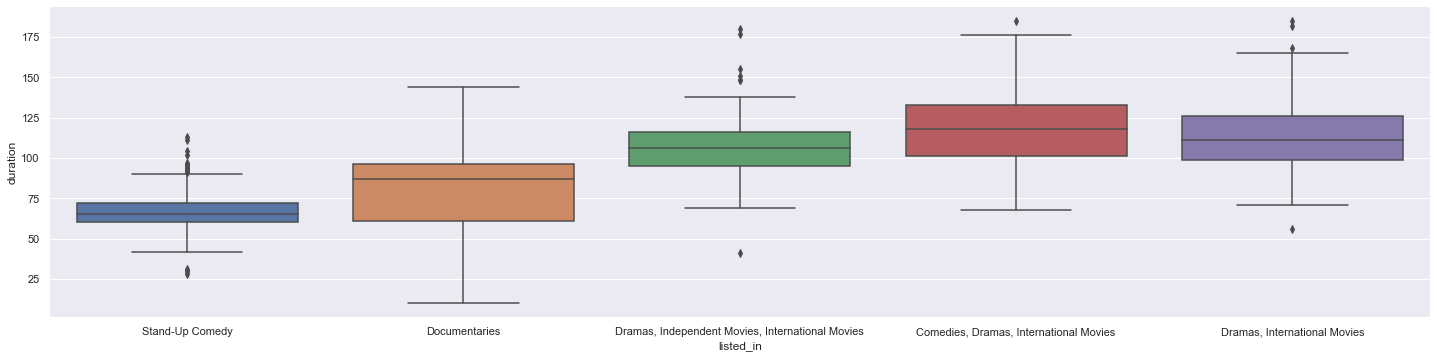

In [237]:
get_boxplot_of_cat(netflix_db,'listed_in','duration',5)

In [240]:
def get_histogram(data_frame,numerical_col):
    data_frame[numerical_col].hist(bins=10)

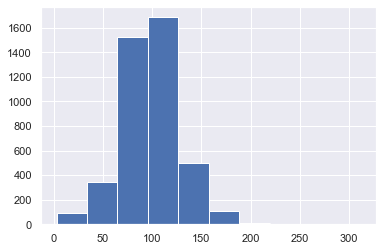

In [241]:
get_histogram(netflix_db, 'duration')